In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

/Users/edilbekabdyrakhmanov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Define the file paths
subdirectory = "/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/3_Model/Neural_Net_Edilbek/pickle_data_3"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Remove 'Datum' column if it exists
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)

# Verify the loaded data by printing their shapes and a few rows
print("Cleaned Training features dimensions:", training_features.shape)
print("Cleaned Validation features dimensions:", validation_features.shape)
print("Cleaned Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of cleaned training features:")
print(training_features.head())
print()
print("First few rows of training labels:")
print(training_labels.head())

Cleaned Training features dimensions: (7487, 24)
Cleaned Validation features dimensions: (1777, 24)
Cleaned Test features dimensions: (0, 24)

Loaded Training labels dimensions: (7487, 1)
Loaded Validation labels dimensions: (1777, 1)
Loaded Test labels dimensions: (0, 1)

First few rows of cleaned training features:
     Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
394               1                 0               0                 0   
395               1                 0               0                 0   
396               1                 0               0                 0   
397               1                 0               0                 0   
398               1                 0               0                 0   

     Weekday_Tuesday  Weekday_Wednesday  Warengruppe_Brötchen  \
394                0                  0                     0   
395                0                  0                     1   
396                0               

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

model.summary()

# Compile with same optimizer for now
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,449 (17.38 KB)

 Non-trainable params: 224 (896.00 B)

In [5]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 66247.6719 - val_loss: 53938.5039
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 61542.6953 - val_loss: 50988.5391
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 54881.3750 - val_loss: 43621.5430
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 49657.6875 - val_loss: 36011.6133
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 42473.0469 - val_loss: 31579.9375
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 32556.1816 - val_loss: 25225.3555
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 26615.9805 - val_loss: 13464.5674
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 22860.8848 - val_loss: 12838.9277
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 17658.5273 - val_loss: 9534.2383
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 14190.2598 - val_loss: 7265.0107
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s

In [6]:
model.save("python_model.h5")

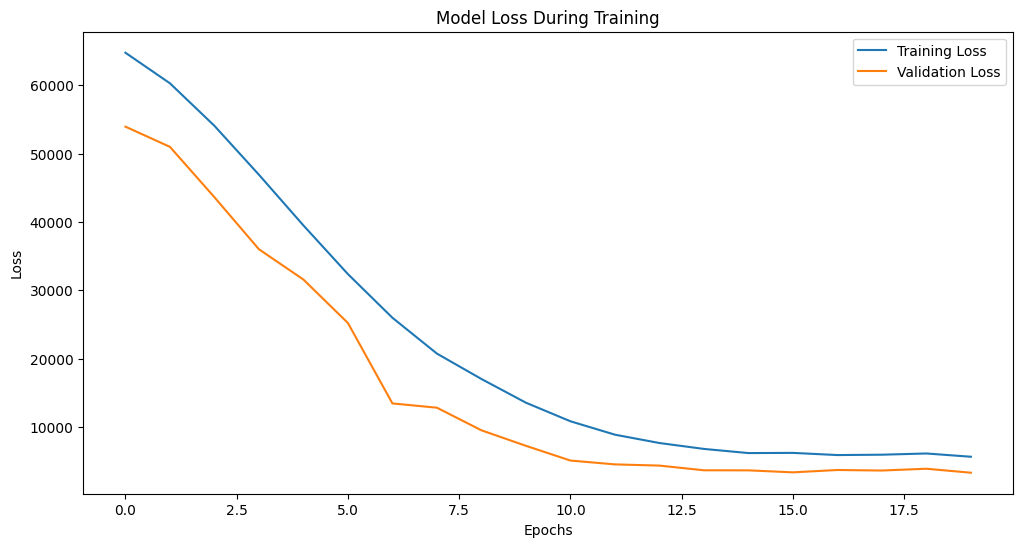

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
MAPE on the Training Data: 24.69%
MAPE on the Validation Data: 24.85%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


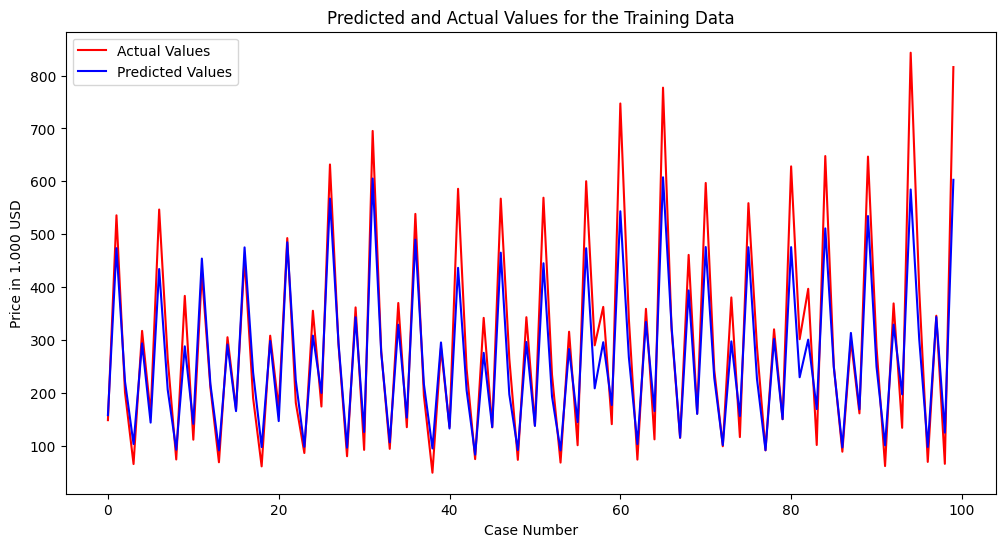

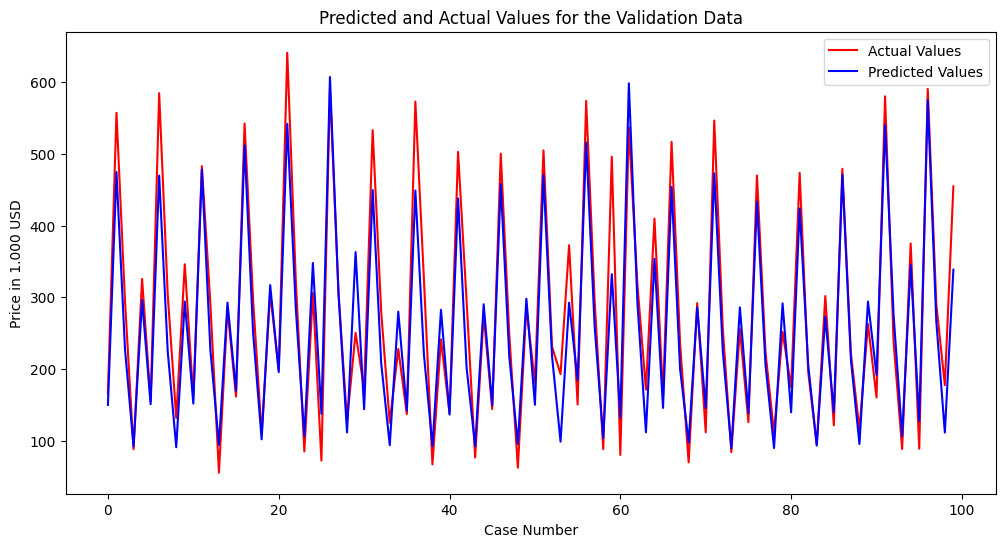

In [9]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')